In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import FinanceDataReader as fdr
df_=fdr.DataReader('SPY','2018-1-1','2019-1-1').iloc[:,:5]

https://github.com/bukosabino/ta

https://technical-analysis-library-in-python.readthedocs.io/en/latest/

https://school.stockcharts.com/doku.php

https://www.investopedia.com/

In [3]:
import ta

In [4]:
def plot(series):
    plt.figure(figsize=(8,4))
    plt.plot(series)
    plt.title(series.name)
    plt.show()
    
def corrmat(a,b, name1,name2):
    return pd.DataFrame({name1:a,name2:b}).dropna().corr()

def sma(series, window):
    return series.rolling(window).mean()

In finance, technical analysis is an analysis methodology for forecasting the direction of prices through the study of past market data, primarily price and volume. Behavioral economics and quantitative analysis use many of the same tools of technical analysis, which, being an aspect of active management, stands in contradiction to much of modern portfolio theory. The efficacy of both technical and fundamental analysis is disputed by the efficient-market hypothesis, which states that stock market prices are essentially unpredictable, and research on whether technical analysis offers any benefit has produced mixed results.

https://en.wikipedia.org/wiki/Technical_analysis

bukosabino's *ta* 42 indicators

Volume

- Money Flow Index (MFI)
- Accumulation/Distribution Index (ADI)
- On-Balance Volume (OBV)
- Chaikin Money Flow (CMF)
- Force Index (FI)
- Ease of Movement (EoM, EMV)
- Volume-price Trend (VPT)
- Negative Volume Index (NVI)
- Volume Weighted Average Price (VWAP)

Volatility

- Average True Range (ATR)
- Bollinger Bands (BB)
- Keltner Channel (KC)
- Donchian Channel (DC)
- Ulcer Index (UI)


Trend

- Simple Moving Average (SMA)
- Exponential Moving Average (EMA)
- Weighted Moving Average (WMA)
- Moving Average Convergence Divergence (MACD)
- Average Directional Movement Index (ADX)
- Vortex Indicator (VI)
- Trix (TRIX)
- Mass Index (MI)
- Commodity Channel Index (CCI)
- Detrended Price Oscillator (DPO)
- KST Oscillator (KST)
- Ichimoku Kinkō Hyō (Ichimoku)
- Parabolic Stop And Reverse (Parabolic SAR)
- Schaff Trend Cycle (STC)


Momentum
- Relative Strength Index (RSI)
- Stochastic RSI (SRSI)
- True strength index (TSI)
- Ultimate Oscillator (UO)
- Stochastic Oscillator (SR)
- Williams %R (WR)
- Awesome Oscillator (AO)
- Kaufman's Adaptive Moving Average (KAMA)
- Rate of Change (ROC)
- Percentage Price Oscillator (PPO)
- Percentage Volume Oscillator (PVO)


Others
- Daily Return (DR)
- Daily Log Return (DLR)
- Cumulative Return (CR)

In [5]:
close = df_.Close
low = df_.Low
open = df_.Open
high = df_.High
volume = df_.Volume
ret = close.pct_change().dropna().rename('ret')
sma_ret = close.rolling(14).mean().pct_change().dropna().rename('sma_ret')
mom = close.diff().dropna().rename('momentum')
mom_volume = volume.diff().dropna().rename('volume_momentum')

In [6]:
allta = ta.add_all_ta_features(df_,'Open','High','Low','Close','Volume')

C:\Users\JHCho\anaconda3\envs\py37\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\JHCho\anaconda3\envs\py37\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [7]:
names = allta.columns
len(names)

88

In [8]:
ohlcv = names[0:5]
volumes = names[5:15]
volatility = names[15:36]
trend = names[36:70]
momentum = names[70:85]
others = names[85:]

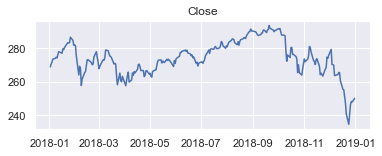

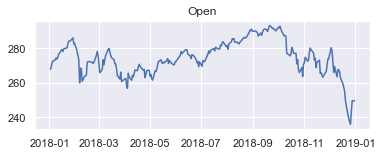

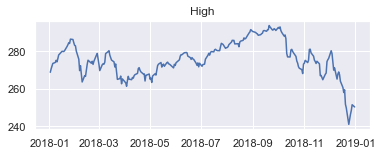

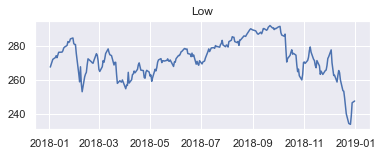

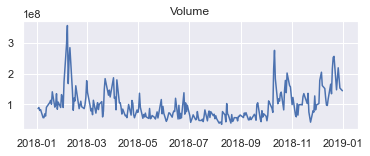

In [9]:
for i in ohlcv:
    plt.figure(figsize=(6,2))
    plt.plot(allta[i])
    plt.title(i)
    plt.show()

Let us see in depth

# Volatility

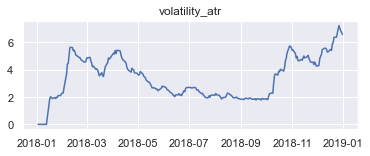

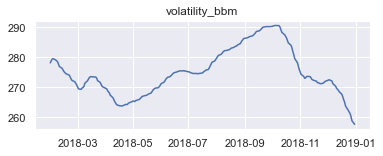

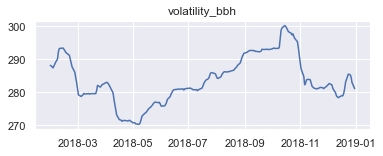

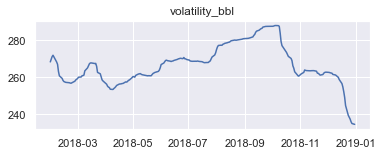

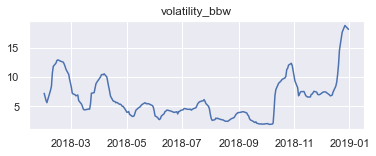

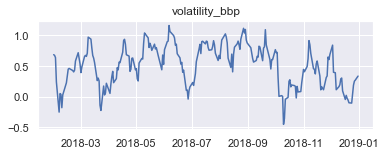

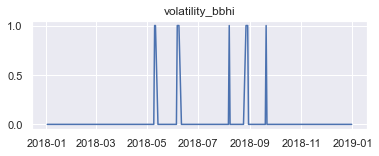

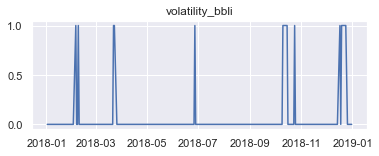

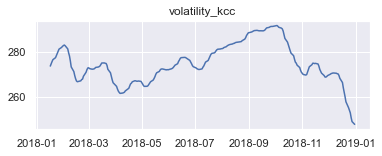

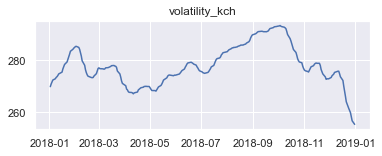

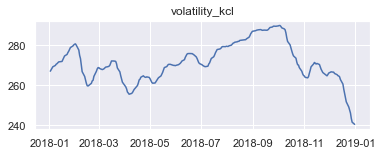

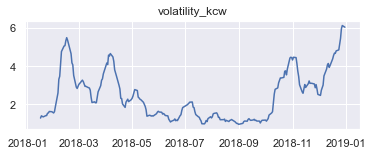

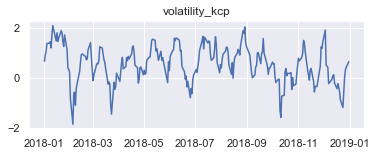

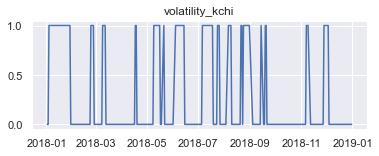

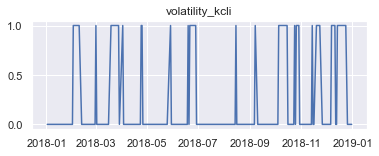

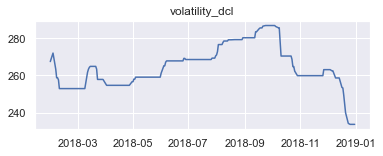

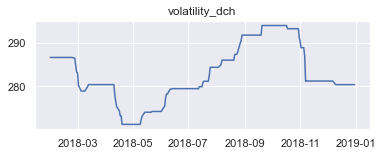

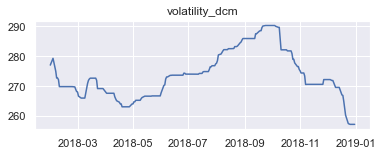

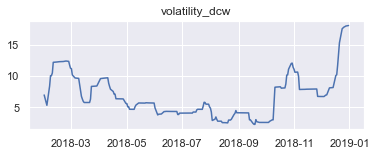

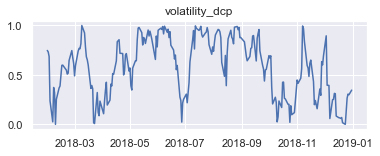

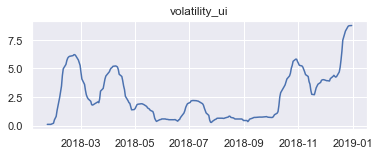

In [10]:
for i in volatility:
    plt.figure(figsize=(6,2))
    plt.plot(allta[i])
    plt.title(i)
    plt.show()

In [30]:
df_volatility = allta[volatility].join([ret,sma_ret,close])

In [31]:
#before see corr, let's drop some unnecessary indicators like upper band, lower band etc.

volatility= ['volatility_atr','volatility_bbp','volatility_kcp','volatility_dcp','volatility_ui']
df_volatility = allta[volatility].join([ret,sma_ret,close])

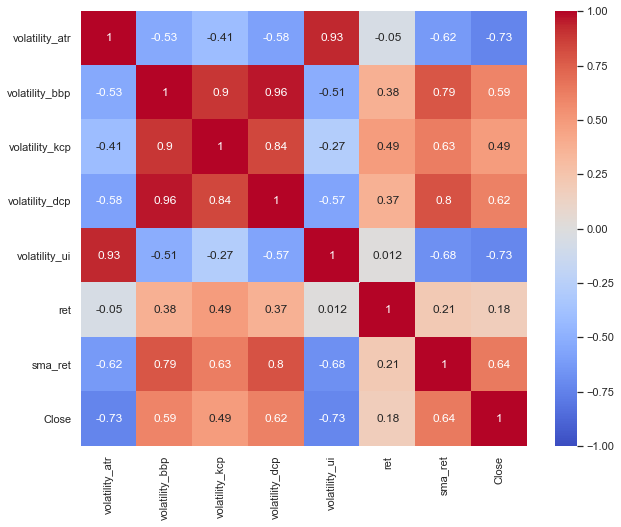

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df_volatility.corr(), cmap='coolwarm',vmin=-1,vmax=1, annot=True)
plt.show()

In [33]:
# Highly correlated market features
corr = df_volatility.corr()
h = 0.75
where = (abs(corr)>h) & (corr<1)

hc_list =[]
for i in range(len(np.where(where)[0])):
    hc_list.append(sorted([corr.columns[np.where(where)[0][i]], corr.columns[np.where(where)[1][i]]]))
hc_list = np.array(sorted(hc_list))[::2,:]
print('Pairs of above-{}-correlated features : \n '.format(h) , hc_list)

Pairs of above-0.75-correlated features : 
  [['sma_ret' 'volatility_bbp']
 ['sma_ret' 'volatility_dcp']
 ['volatility_atr' 'volatility_ui']
 ['volatility_bbp' 'volatility_dcp']
 ['volatility_bbp' 'volatility_kcp']
 ['volatility_dcp' 'volatility_kcp']]


## Average True Range (ATR)
True Range (TR), which is defined as the greatest of the following:

- Method 1: Current High less the current Low
- Method 2: Current High less the previous Close (absolute value)
- Method 3: Current Low less the previous Close (absolute value)


Current ATR = [(Prior ATR x 13) + Current TR] / 14

  - Multiply the previous 14-day ATR by 13.
  - Add the most recent day's TR value.
  - Divide the total by 14


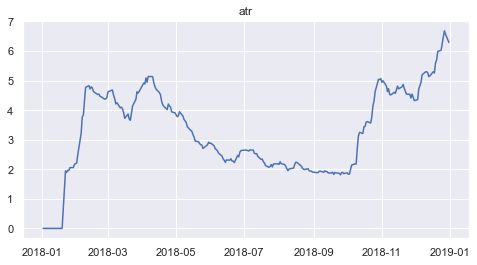

In [34]:
atr = ta.volatility.average_true_range(high,low,close,window=14)
plot(atr)

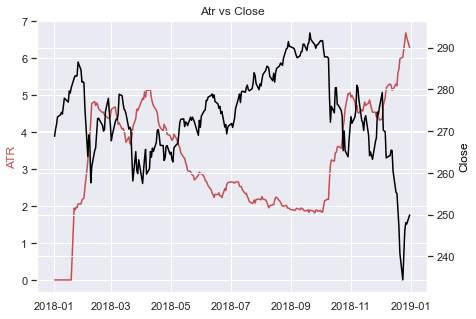

In [35]:
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()
ax1.plot(atr,color='r')
ax2.plot(close,c='black')
ax1.set_ylabel('ATR',c='r')
ax2.set_ylabel('Close',c='black')
plt.title('Atr vs Close')
plt.show()

Limitations of the Average True Range (ATR)


- ATR is a subjective measure, meaning that it is open to interpretation. There is no single ATR value that will tell you with any certainty that a trend is about to reverse or not. Instead, ATR readings should always be compared against earlier readings to get a feel of a trend's strength or weakness.

- Second, ATR only measures volatility and not the direction of an asset's price. This can sometimes result in mixed signals, particularly when markets are experiencing pivots or when trends are at turning points. For instance, a sudden increase in the ATR following a large move counter to the prevailing trend may lead some traders to think the ATR is confirming the old trend; however, this may not actually be the case.

## Bollinger Bands

* Middle Band = 20-day simple moving average (SMA)
* Upper Band = 20-day SMA + (20-day standard deviation of price x 2) 
* Lower Band = 20-day SMA - (20-day standard deviation of price x 2)


- P band: %B = (Price - Lower Band)/(Upper Band - Lower Band)
    - %B can be used to identify overbought and oversold situations.
    - More like momentum indicator
    
example

John Bollinger described a trend-following system using %B with the Money Flow Index (MFI). An uptrend begins when %B is above .80 and MFI(10) is above 80. MFI is bound between zero and one hundred. A move above 80 places MFI(10) in the upper 20% of its range, which is a strong reading. Downtrends are identified when %B is below .20 and MFI(10) is below 20.

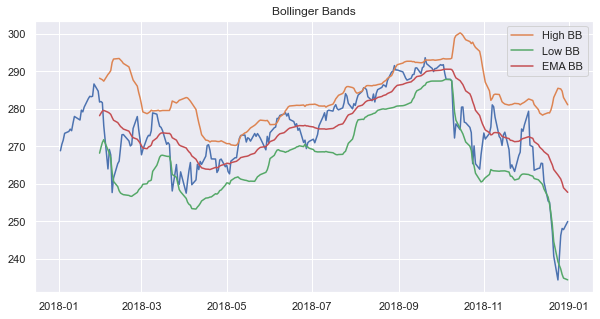

In [36]:
plt.figure(figsize=(10,5))
plt.plot(close)
plt.plot(allta.volatility_bbh, label='High BB')
plt.plot(allta.volatility_bbl, label='Low BB')
plt.plot(allta.volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

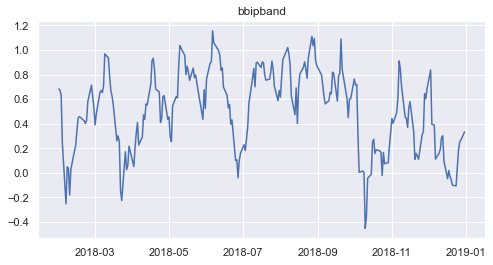

In [37]:
bbpi = ta.volatility.bollinger_pband(close,window=20)
plot(bbpi)

Limitations of Bollinger Bands

- Bollinger Bands are not a standalone trading system. They are simply one indicator designed to provide traders with information regarding price volatility. John Bollinger suggests using them with two or three other non-correlated indicators that provide more direct market signals.
- Because they are computed from a simple moving average, they weight older price data the same as the most recent, meaning that new information may be diluted by outdated data. Also, the use of 20-day SMA and 2 standard deviations is a bit arbitrary and may not work for everyone in every situation. Traders should adjust their SMA and standard deviation assumptions accordingly and monitor them.

## Donchian Channel

Donchian Channels are three lines generated by moving average calculations that comprise an indicator formed by upper and lower bands around a midrange or median band.

- UC = Highest High in Last N Periods

- Middle Channel=((UC+LC)/2)

- LC = Lowest Low in Last N periods

The Difference Between Donchian Channels and Bollinger Bands

- Donchian Channels plot the highest high and lowest low over N periods while Bollinger Bands plot a simple moving average (SMA) for N periods plus/minus the standard deviation of price for N periods X 2. This results in a more balanced calculation that reduces the impact of big high or low prints.

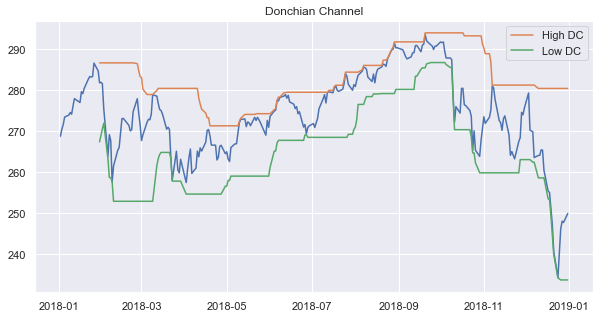

In [38]:
plt.figure(figsize=(10,5))
plt.plot(allta.Close)
plt.plot(allta.volatility_dch, label='High DC')
plt.plot(allta.volatility_dcl, label='Low DC')
plt.title('Donchian Channel')
plt.legend()
plt.show()

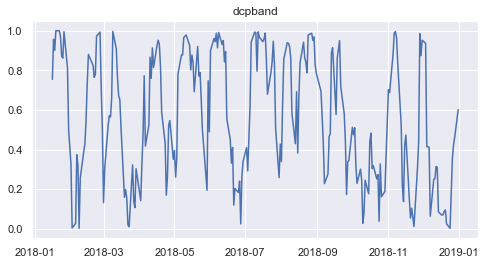

In [39]:
dcpi = ta.volatility.donchian_channel_pband(high,low,close)
plot(dcpi)

In [40]:
corrmat(bbpi,dcpi,'Bollinger Band %B','Donchian Channel %B')

,Bollinger Band %B,Donchian Channel %B
Bollinger Band %B,1.000000,0.850978
Donchian Channel %B,0.850978,1.000000


Limitations of Using Donchian Channels

- Markets move according to many cycles of activity. An arbitrary or commonly used N period value for Donchian Channels may not reflect current market conditions, generating false signals that can undermine trading and investment performance.

## Keltner Channels

Keltner Channels are a trend following indicator used to identify reversals with channel breakouts and channel direction. Channels can also be used to identify overbought and oversold levels when the trend is flat.

- Middle Line: 20-day exponential moving average 
- Upper Channel Line: 20-day EMA + (2 x ATR(10))
- Lower Channel Line: 20-day EMA - (2 x ATR(10))

Keltner Channels vs. Bollinger Bands

- These two indicators are quite similar. Keltner Channels use ATR to calculate the upper and lower bands while Bollinger Bands use standard deviation instead.

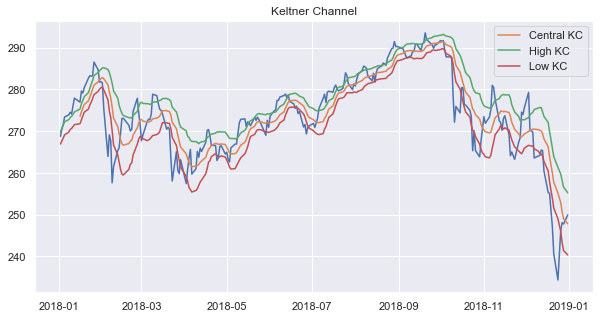

In [42]:
plt.figure(figsize=(10,5))
plt.plot(allta.Close)
plt.plot(allta.volatility_kcc, label='Central KC')
plt.plot(allta.volatility_kch, label='High KC')
plt.plot(allta.volatility_kcl, label='Low KC')
plt.title('Keltner Channel')
plt.legend()
plt.show()

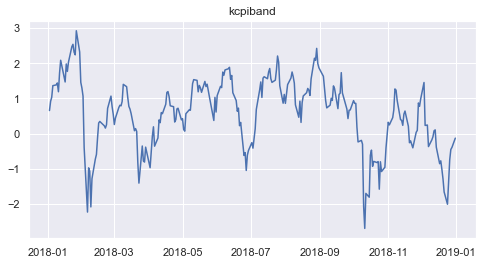

In [49]:
kcpi = ta.volatility.keltner_channel_pband(high,low,close).rename('kcpiband')
plot(kcpi)

In [50]:
pd.DataFrame([bbpi,dcpi,kcpi]).T.dropna().corr()

,bbipband,dcpband,kcpiband
bbipband,1.000000,0.850978,0.964521
dcpband,0.850978,1.000000,0.794019
kcpiband,0.964521,0.794019,1.000000


Each bands' % indicators are correlated.

Keltner Channel Limitations

- While Keltner Channels can help identify trend direction, and even provide some trade signals, they are best used in conjunction with price action analysis, fundamentals if trading for the long term, and other technical indicators.

- The bands may also not act as support or resistance and they may seem to have little forecasting ability at all. This could be due to the settings chosen, but there is also no evidence that the price moving two ATRs or hitting one of the bands will result in a trading opportunity or something significant happening.

## Ulcer Index

Percent-Drawdown = ((Close - 14-period Max Close)/14-period Max Close) x 100

Squared Average = (14-period Sum of Percent-Drawdown Squared)/14 

Ulcer Index = Square Root of Squared Average

- Investors can use the Ulcer Index to compare different investment options. A lower average Ulcer Index means lower drawdown risk compared with an investment with a higher average UI. Applying a moving average to the Ulcer Index will show which stocks and funds have lower volatility overall.
- Watching for spikes in the Ulcer Index that are beyond "normal" can also be used to indicate times of excessive downside risk, which investors may wish to avoid by exiting long positions.

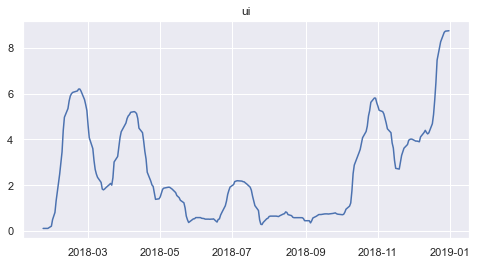

In [47]:
ui = ta.volatility.ulcer_index(close)
plot(ui)

# Conclusion

- Average True Range (ATR)
- Bollinger Bands (BB)
- Keltner Channel (KC)
- Donchian Channel (DC)
- Ulcer Index (UI)

What indicator can we use for features?

- It should not have trend.
- Let's find out which indicators are stationary.
    - % bands. but they are all correlated.
    - they are more like momentum indicators.
- I'll say standard deviation itself could be more attractive feature than atr or ui.
    - But standard deviation is not stationary.

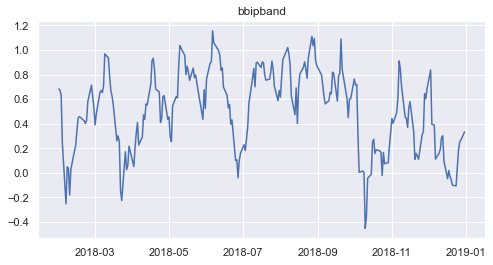

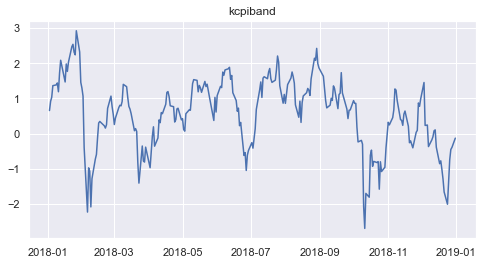

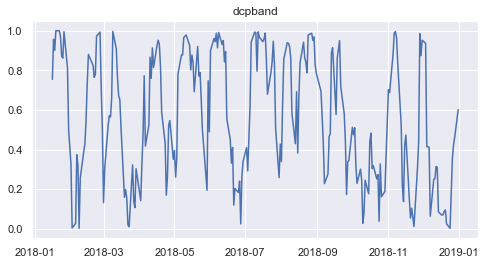

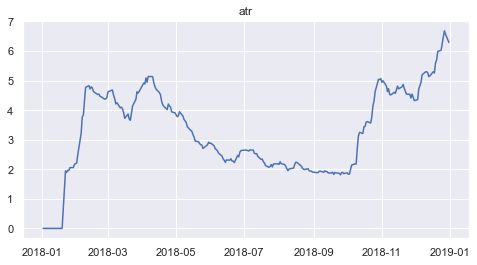

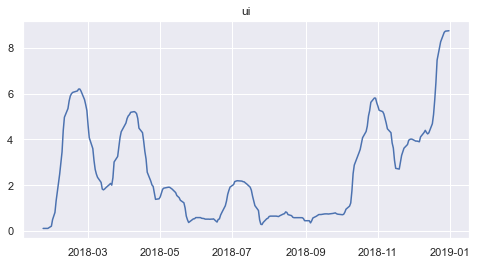

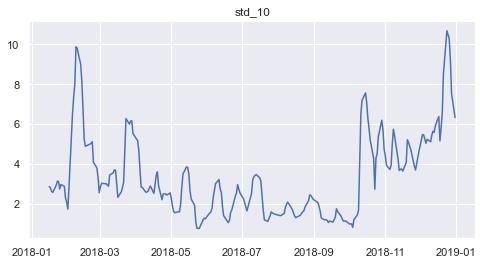

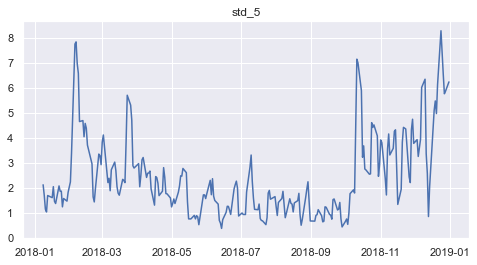

In [53]:
# possible features
std_10 = close.rolling(10).std().rename('std_10')
std_5 = close.rolling(5).std().rename('std_5')

plot(bbpi)
plot(kcpi)
plot(dcpi)
plot(atr)
plot(ui)
plot(std_10)
plot(std_5)

In [64]:
features = pd.DataFrame([bbpi,dcpi,std_10,std_5]).T.dropna()
features

,bbipband,dcpband,std_10,std_5
Date,,,,
2018-01-30,0.681997,0.495859,2.302314,1.819945
2018-01-31,0.670789,0.412422,2.091098,2.025014
2018-02-01,0.634172,0.325768,1.744000,2.233428
2018-02-02,0.238440,0.003565,2.878717,3.392695
2018-02-05,-0.252094,0.026587,6.514807,7.759551
...,...,...,...,...
2018-12-24,-0.105606,0.002016,10.675105,8.293190
2018-12-26,0.185881,0.352440,10.271680,6.551527
2018-12-27,0.250817,0.424251,9.179889,5.767701


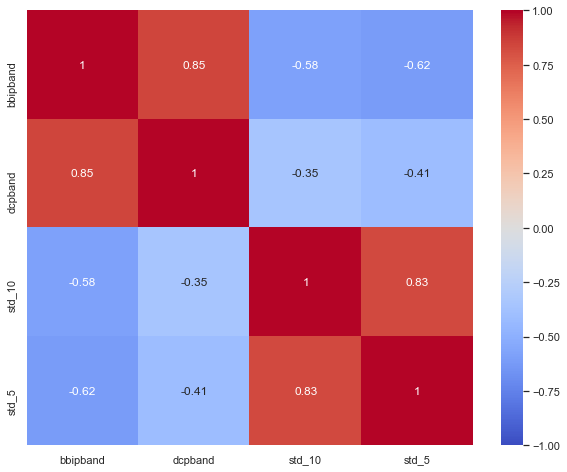

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(features.corr(), cmap='coolwarm',vmin=-1,vmax=1, annot=True)
plt.show()

For fewer features we can drop force index and ADI signal.

In [66]:
features = features.drop(columns=['dcpband','std_5'])

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
def minmaxscaler(x):
    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index = x.index)

In [69]:
features = minmaxscaler(features)
features

,bbipband,std_10
Date,,
2018-01-30,0.705077,0.153831
2018-01-31,0.698104,0.132486
2018-02-01,0.675326,0.097407
2018-02-02,0.429153,0.212084
2018-02-05,0.124005,0.579553
...,...,...
2018-12-24,0.215131,1.000000
2018-12-26,0.396457,0.959229
2018-12-27,0.436852,0.848891


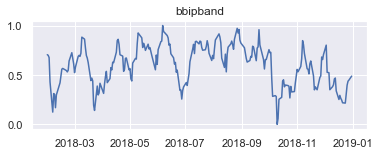

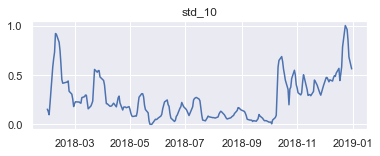

In [70]:
for i in features:
    plt.figure(figsize=(6,2))
    plt.plot(features[i])
    plt.title(i)
    plt.show()

In [82]:
y = np.sign(close.diff(-3)).rename('Direction after 3 day')

C:\Users\JHCho\anaconda3\envs\py37\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


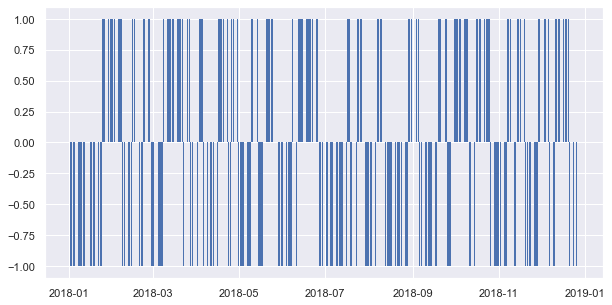

In [95]:
plt.figure(figsize=(10,5))
plt.bar(y.index,y, linewidth=0)
plt.show()

In [73]:
data = features.join(y).dropna()

In [74]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [79]:
rf.feature_importances_

array([0.48761595, 0.51238405])